# **Chatbot with Langgraph**

In [8]:
!pip install langgraph langsmith

In [9]:
!pip install langchain langchain_groq langchain_community

In [10]:
from google.colab import userdata
groq_api_key = userdata.get('groq_api_key')

langsmith = userdata.get('langsmith_api_key')

ModuleNotFoundError: No module named 'google.colab'

In [10]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "CourseLanggraph"

In [11]:
from langchain_groq import ChatGroq

In [ ]:
llm = ChatGroq(groq_api_key = groq_api_key, model_name = "Gemma2-9b-It")

NameError: name 'ChatGroq' is not defined

## Start Building Chatbot Using Langgraph

In [15]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [17]:
class State(TypedDict):
  # Messages have the type "list". The 'add_messages' function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends the messages to the list, rather than overwriting them)
  messages : Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [19]:
def chatbot(state : State):
  return {"messages": llm.invoke(state['messages'])}

In [20]:
graph_builder.add_node("chatbot", chatbot)

In [21]:
graph_builder

In [22]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

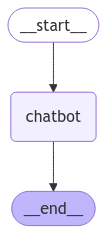

In [23]:
graph = graph_builder.compile()
graph

In [24]:
while True :
  user_input = input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user", user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:", value["messages"].content)

User: hello
dict_values([{'messages': AIMessage(content='Hello! 👋\n\nHow can I help you today?\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 10, 'total_tokens': 24, 'completion_time': 0.025454545, 'prompt_time': 3.9e-07, 'queue_time': 0.025065590000000002, 'total_time': 0.025454935}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-7e1dceac-c618-496d-a7ba-615b3da12a14-0', usage_metadata={'input_tokens': 10, 'output_tokens': 14, 'total_tokens': 24})}])
content='Hello! 👋\n\nHow can I help you today?\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 10, 'total_tokens': 24, 'completion_time': 0.025454545, 'prompt_time': 3.9e-07, 'queue_time': 0.025065590000000002, 'total_time': 0.025454935}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-7e1